# Lab 4: Team 22

[Αρχικός κώδικας και notebook](https://drive.google.com/drive/folders/1E8kMrfIANK7TVi8wFBxq2sasncG9WdI3?fbclid=IwAR3Fwh08OOf1sZUJA-4ietsKRIVrJnxpjSUmuqDlXbSNYnwX4VGMMvITStQ)

## Ανακατασκευή εικόνας

* Φοίβος Καλεμκερής (03116010)
* Νικολέτα Ηλιακοπούλου (03116111)


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Useful Functions

In [ ]:
def image_combiner(cut, generated):
  full_image = np.concatenate((cut,generated))
  return full_image

In [ ]:
def psnr(img_data1, img_data2):
    mse = np.mean( (img_data1 - img_data2) ** 2 )
    if mse == 0:
      return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

def max_error (img_data1, img_data2):
    return np.max(abs(img_data1-img_data2))

In [ ]:
#load data for half output images
def load_generated(path):
  f = open(path)
  content = f.readlines()[1:]
  f.close()

  data_sw = []
  data_hw = []

  for s in content:
    t = s.split(';')
    data_sw.append(float(t[0]))
    data_hw.append(float((t[1].split('\n'))[0]))
    
  data_sw = np.asarray(data_sw)
  data_hw = np.asarray(data_hw)

  return (data_sw, data_hw)

In [ ]:
def show_combined(data, idx, offset):
  # combined image for software output
  output_sw = image_combiner(data[idx,:].reshape(14,28), data_sw[idx*offset:idx*offset+offset].reshape(14,28))

  # combined image for hardware output
  output_hw = image_combiner(data[idx,:].reshape(14,28), data_hw[idx*offset:idx*offset+offset].reshape(14,28))

  plt.figure()
  plt.title("Software output")
  plt.imshow(output_sw.reshape((28,28)).astype(np.float32), cmap = 'gray')
  plt.axis('off')

  plt.figure()
  plt.title("Hardware output")
  plt.imshow(output_hw.reshape((28,28)).astype(np.float32), cmap = 'gray')
  plt.axis('off')

  return (output_sw, output_hw)

## Load Half-Image

In [ ]:
# load data for half input images
f = open('/content/drive/MyDrive/Ενσωματωμένα./Lab4/codes/data.txt')
content = f.read()
f.close()

data = []

for line in content.split('\n'):
    if line != '':
        row = line.split(';')
        data.append(list(map(float, row)))
        
        
data = np.asarray(data)

In [ ]:
data.shape

(10000, 392)

In [ ]:
offset = 14*28  # offset for pixels of half image, do not change

## Tanh 8 bit

Αρχικά, δοκιμάζουμε την έκδοση του κώδικα που δίνεται (8 bit). Αφού παράξουμε το αρχείο output.txt στο zybo, φορτώνουμε τα δεδομένα για τη μισή εικόνα, όπως φαίνεται παρακάτω:

In [ ]:
data_sw, data_hw = load_generated('/content/drive/MyDrive/Ενσωματωμένα./Lab4/codes/outputs/initial_output.txt')

Έπειτα, πειραματιζόμαστε με διαφορετικές τιμές του idx, προκειμένου να ελέγξουμε την απόδοση για διαφορετικές εικόνες.

### idx = 10

(-0.5, 27.5, 13.5, -0.5)

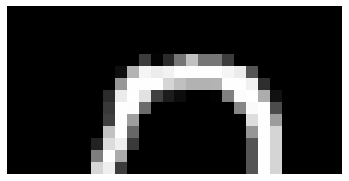

In [ ]:
#Set Image to evaluate
idx = 10

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

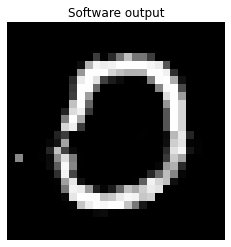

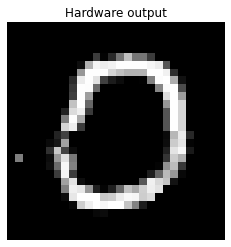

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  16
Peak Signal-to-Noise Ratio:  42.6822168370888


### idx = 11

(-0.5, 27.5, 13.5, -0.5)

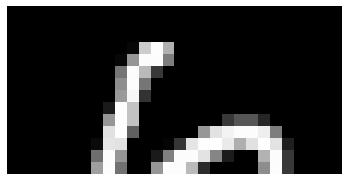

In [ ]:
#Set Image to evaluate
idx = 11

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

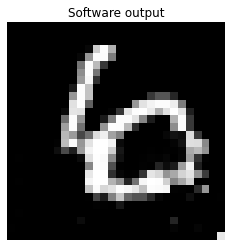

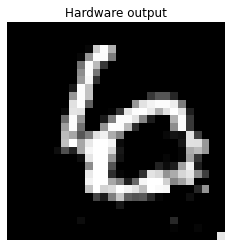

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  17
Peak Signal-to-Noise Ratio:  42.56993337396983


### idx = 12

(-0.5, 27.5, 13.5, -0.5)

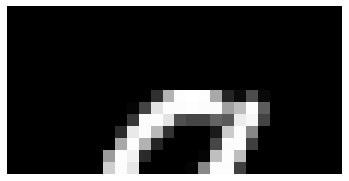

In [ ]:
#Set Image to evaluate
idx = 12

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

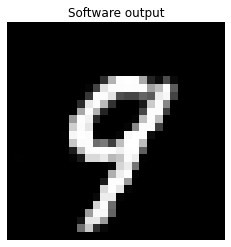

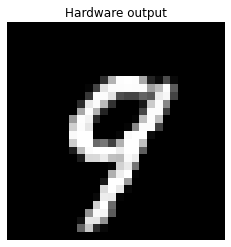

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  13
Peak Signal-to-Noise Ratio:  47.065287020211215


## Tanh 4 bit

Ύστερα, δοκιμάζουμε για 4 bit. Αφού παράξουμε το αρχείο output.txt στο zybo, φορτώνουμε τα δεδομένα για τη μισή εικόνα, όπως φαίνεται παρακάτω:

In [ ]:
data_sw, data_hw = load_generated('/content/drive/MyDrive/Ενσωματωμένα./Lab4/codes/outputs/tanh_4_output.txt')

Έπειτα, πειραματιζόμαστε με διαφορετικές τιμές του idx, προκειμένου να ελέγξουμε την απόδοση για διαφορετικές εικόνες.

### idx = 10

(-0.5, 27.5, 13.5, -0.5)

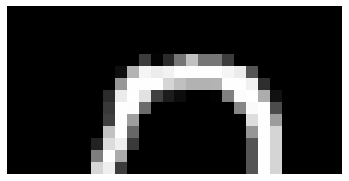

In [ ]:
#Set Image to evaluate
idx = 10

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

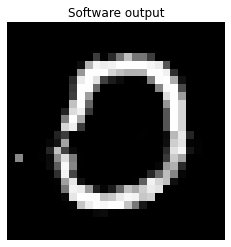

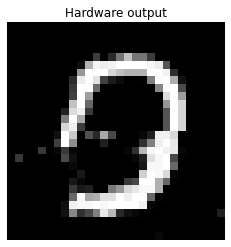

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  255
Peak Signal-to-Noise Ratio:  14.051663945384881


### idx = 11

(-0.5, 27.5, 13.5, -0.5)

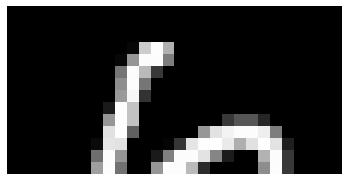

In [ ]:
#Set Image to evaluate
idx = 11

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

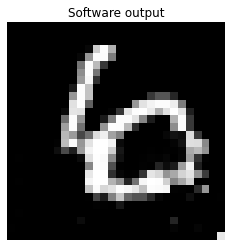

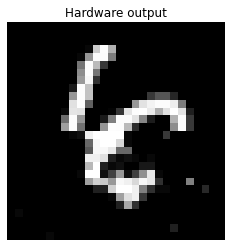

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  249
Peak Signal-to-Noise Ratio:  14.634988266184102


### idx = 12

(-0.5, 27.5, 13.5, -0.5)

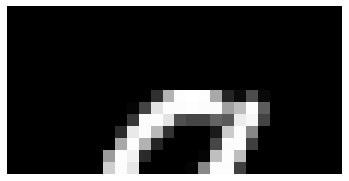

In [ ]:
#Set Image to evaluate
idx = 12

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

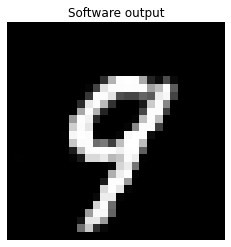

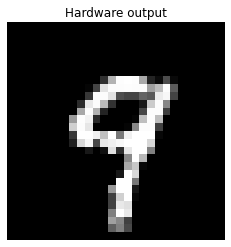

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  255
Peak Signal-to-Noise Ratio:  13.525831164368576


## Tanh 10 bit

Τέλος, δοκιμάζουμε για 10 bit. Αφού παράξουμε το αρχείο output.txt στο zybo, φορτώνουμε τα δεδομένα για τη μισή εικόνα, όπως φαίνεται παρακάτω:

In [ ]:
data_sw, data_hw = load_generated('/content/drive/MyDrive/Ενσωματωμένα./Lab4/codes/outputs/tanh_10_output.txt')

Έπειτα, πειραματιζόμαστε με διαφορετικές τιμές του idx, προκειμένου να ελέγξουμε την απόδοση για διαφορετικές εικόνες.

### idx = 10

(-0.5, 27.5, 13.5, -0.5)

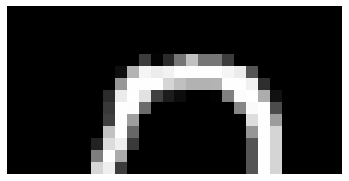

In [ ]:
#Set Image to evaluate
idx = 10

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

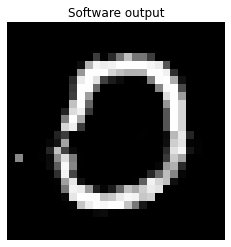

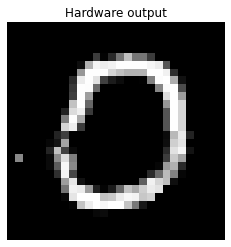

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  5
Peak Signal-to-Noise Ratio:  54.08543347142643


### idx = 11

(-0.5, 27.5, 13.5, -0.5)

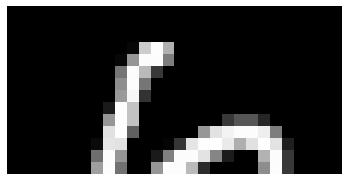

In [ ]:
#Set Image to evaluate
idx = 11

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

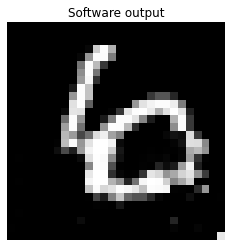

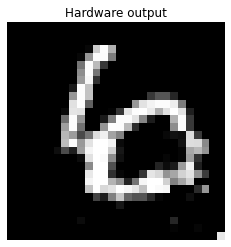

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  5
Peak Signal-to-Noise Ratio:  52.556099880280584


### idx = 12

(-0.5, 27.5, 13.5, -0.5)

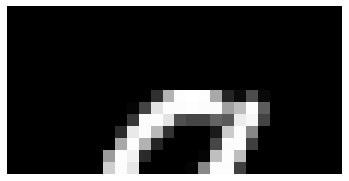

In [ ]:
#Set Image to evaluate
idx = 12

plt.figure()
plt.imshow(data[idx,:].reshape(14,28), cmap = 'gray')
plt.axis('off')

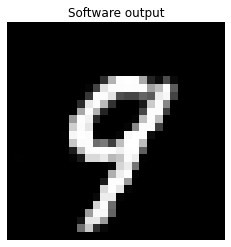

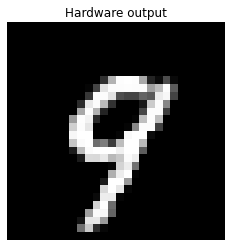

In [ ]:
output_sw, output_hw = show_combined(data, idx, offset)

In [ ]:
# scale images to 0-255
img_data_hw=(output_hw*127.5 + 127.5).astype(int)
img_data_sw=(output_sw*127.5 + 127.5).astype(int)

In [ ]:
print ("Max pixel error: ", max_error(img_data_sw, img_data_hw))
print ("Peak Signal-to-Noise Ratio: ", psnr(img_data_sw, img_data_hw))

Max pixel error:  4
Peak Signal-to-Noise Ratio:  53.76982650203158
